### 02_projecte_datasceince_sql

In [66]:
#Basicques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import re

#SQL
import mysql.connector
from sqlalchemy import create_engine

#warnings
import warnings
warnings.filterwarnings('ignore')
#Options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

#dire = 'C:\Users\Anton SL\OneDrive\Documentos\IT_Academics\Data_Science\DataScienceProject\plots'

# Grafic de pronostic
#from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy.stats as stats

### <span style=color:darkred>Scripts MySQL </span>

In [27]:
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="Zxcvbn123+-",
  database='cryptopunks'
)

print(mydb)

In [28]:
mycursor = mydb.cursor()

### <span style=color:darkred>Generem dos Dataframe per analitzar les característiques físiques </span>


#### Generem un datafram  amb tots els Cryptopunks i els atributs

In [29]:
myquery1=('select mp.ippunks, pa.TypeCripto,pa.counter,pa.accesories  from master_punks as mp inner join punks_accesories as pa on  mp.ippunks =pa.idpunks;')

df_all = pd.read_sql(myquery1, mydb)

In [30]:
df_all

,ippunks,TypeCripto,counter,accesories
0,0,Female,1,Green Eye Shadow
1,0,Female,1,Blonde Bob
2,1,Male,1,Smile
3,1,Male,1,Mohawk
4,2,Female,1,Wild Hair
...,...,...,...,...
27497,9998,Female,1,Wild White Hair
27498,9998,Female,1,Black Lipstick
27499,9998,Female,1,Clown Eyes Green
27500,9999,Female,1,Mohawk


In [31]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27502 entries, 0 to 27501
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ippunks     27502 non-null  int64 
 1   TypeCripto  27502 non-null  object
 2   counter     27502 non-null  int64 
 3   accesories  27502 non-null  object
dtypes: int64(2), object(2)
memory usage: 859.6+ KB


In [32]:
df_all.to_csv('df_all.csv')

#### Generem un segon  dataframe   amb tots els Cryptopunks  mes venuts i els atributs

In [33]:
myquery2 = ('select ts.Num_CriptoPunk, pa.TypeCripto,pa.counter,pa.accesories  from topsales as ts inner join punks_accesories as pa on  ts.Num_CriptoPunk =pa.idpunks;')

df_ts = pd.read_sql(myquery2, mydb)

In [34]:
df_ts

,Num_CriptoPunk,TypeCripto,counter,accesories
0,143,Male,1,Horned Rim Glasses
1,143,Male,1,Horned Rim Glasses
2,382,Female,1,Pilot Helmet
3,382,Female,1,Cigarette
4,627,Male,1,Hoodie
5,638,Male,1,Chinstrap
6,638,Male,1,Top Hat
7,638,Male,1,Smile
8,638,Male,1,VR
9,824,Male,1,Nerd Glasses


In [35]:
df_ts.to_csv('df_ts.csv')

### <span style=color:darkred>Análisis exploratori DataFrame creats Accesorie</span>


#### comparació dels 10 atributa més repetitis en dues Tbl.

In [36]:
df_all['accesories'].value_counts(normalize=True).head(10)*100

Earring               8.937532
Cigarette             3.494291
Hot Lipstick          2.530725
Purple Lipstick       2.381645
Mole                  2.341648
Black Lipstick        2.243473
Nerd Glasses          2.079849
Horned Rim Glasses    1.945313
Big Shades            1.945313
Regular Shades        1.916224
Name: accesories, dtype: float64

<AxesSubplot:xlabel='Percentatge', ylabel='Accesori'>

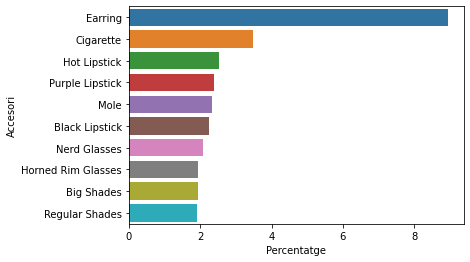

In [37]:
mydcit = dict(df_all['accesories'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
#plt.savefig('\.plot\image1.png')

<AxesSubplot:xlabel='Percentatge', ylabel='Accesori'>

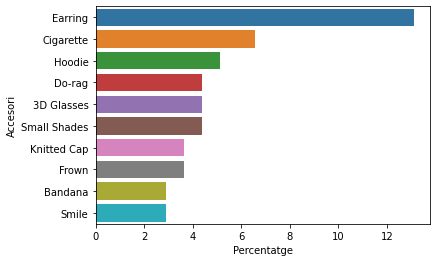

In [38]:
mydcit = dict(df_ts['accesories'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
#plt.savefig('\.plot\image2.png')

### <span style=color:darkred>Análisis exploratori types </span>

#### entre tots els CryptoPunks


<AxesSubplot:xlabel='Percentatge', ylabel='Accesori'>

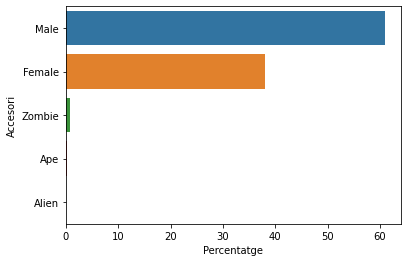

In [39]:
mydcit = dict(df_all['TypeCripto'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
#plt.savefig('\.plot\image1.png')

#### Entre el mes venuts

<AxesSubplot:xlabel='Percentatge', ylabel='Accesori'>

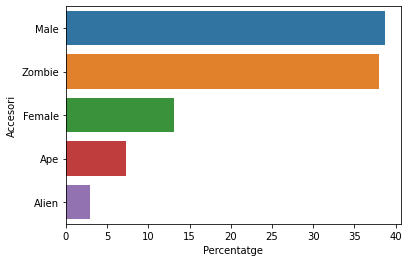

In [40]:
mydcit = dict(df_ts['TypeCripto'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
#plt.savefig('\.plot\image1.png')

Hi ha una diferencia important entre els types mes venuts i els types de tota la base de dades. Entre els mes venuts Zombie esta en segona posició a diferència de Female que estaria en segoan posició entre tots els Criptopunks.

### <span style=color:darkred>Análisis exploratori Types número de Accesories </span>

#### Entre tots els CryptoPunks

In [41]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27502 entries, 0 to 27501
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ippunks     27502 non-null  int64 
 1   TypeCripto  27502 non-null  object
 2   counter     27502 non-null  int64 
 3   accesories  27502 non-null  object
dtypes: int64(2), object(2)
memory usage: 859.6+ KB


In [42]:
myquery1=('select  pa.idpunks, pa.TypeCripto, count( pa.counter) as NumeroAccesorio from punks_accesories  pa group by pa.idpunks, pa.TypeCripto;')

df_all = pd.read_sql(myquery1, mydb)

df_all

,idpunks,TypeCripto,NumeroAccesorio
0,0,Female,2
1,1,Male,2
2,2,Female,1
3,3,Male,3
4,4,Male,4
...,...,...,...
9992,9995,Female,2
9993,9996,Male,4
9994,9997,Zombie,2
9995,9998,Female,3


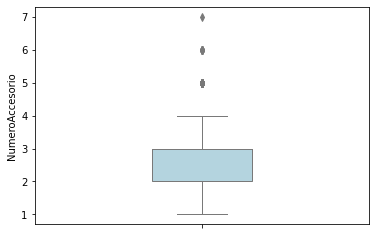

In [43]:
ax = sns.boxplot(y = df_all['NumeroAccesorio'], 
                 color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

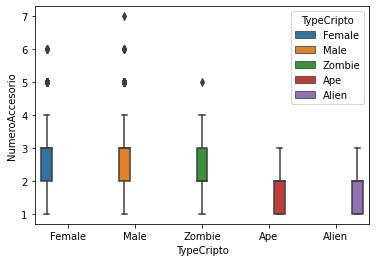

In [44]:
sns.boxplot(x='TypeCripto', y= 'NumeroAccesorio', hue='TypeCripto', 
               data=df_all[df_all.NumeroAccesorio > 0]);

#### Entre tots els mes venuts

In [45]:
myquery1 = ('select  pa.idpunks, pa.TypeCripto, sum( pa.counter) as NumeroAccesorio from punks_accesories  pa inner join topsales ts on pa.idpunks = ts.idtopsales group by pa.idpunks, pa.TypeCripto;')

df_ts = pd.read_sql(myquery1, mydb)


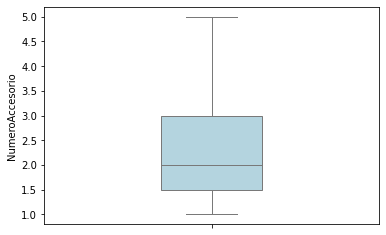

In [46]:
ax = sns.boxplot(y = df_ts['NumeroAccesorio'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

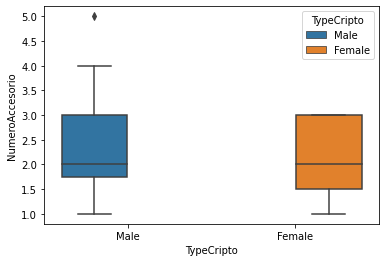

In [47]:
sns.boxplot(x='TypeCripto', y= 'NumeroAccesorio', hue='TypeCripto', 
               data=df_ts[df_ts.NumeroAccesorio > 0]);



### <span style=color:darkred>Análisis exploratori informació Rarity </span>

In [51]:
# select ht.*, ra.rarity from historico_trans2 ht inner join rarity ra on ht.id = ra.id;

myquery2 = ('select ht.*, ra.rarity from historico_trans2 ht inner join rarity ra on ht.cryptopunk_number = ra.id;')
df_hist = pd.read_sql(myquery2, mydb)
df_hist

,id,transaccion_date,cryptopunk_number,trs_type,de,para,amount_dolars,amount_eth,user_transaction,adj_close,rarity
0,35,2020-11-30,1,Transfer,0xcf6165,0xb88f61,0.00,0.0,0x9ac3a7,614.843,0.094547
1,36,2020-11-30,1,Sold,0xeE3766,0xcf6165,36890.60,60.0,0xf4af55,614.843,0.094547
2,37,2020-11-30,1,Bid,0xcf6165,no,36890.60,60.0,0x7399ca,614.843,0.094547
3,38,2020-11-25,1,Offered,no,no,45369.60,79.5,0x830648,570.687,0.094547
4,39,2020-11-23,1,Bid withdrawn,0x63a9db,no,30422.70,50.0,0x385332,608.454,0.094547
...,...,...,...,...,...,...,...,...,...,...,...
128133,128196,2020-10-29,9619,Bid withdrawn,0x34e801,no,386.73,1.0,0x9ab549,386.730,0.054195
128134,128197,2020-10-21,9619,Bid,0x34e801,no,392.19,1.0,0x043e91,392.190,0.054195
128135,128198,2019-10-31,9619,Sold,0x243d84,0xdc925a,55.19,0.3,0x2f0919,183.967,0.054195
128136,128199,2018-10-03,9619,Transfer,0x976B59,0x243d84,0.00,0.0,0xa2253e,220.489,0.054195


In [52]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128138 entries, 0 to 128137
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 128138 non-null  int64  
 1   transaccion_date   128138 non-null  object 
 2   cryptopunk_number  128138 non-null  int64  
 3   trs_type           128138 non-null  object 
 4   de                 128138 non-null  object 
 5   para               128138 non-null  object 
 6   amount_dolars      128138 non-null  float64
 7   amount_eth         128138 non-null  float64
 8   user_transaction   128138 non-null  object 
 9   adj_close          128138 non-null  float64
 10  rarity             128138 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 10.8+ MB


In [57]:
print('metjana rarity' + str (df_hist.rarity.mean()))
print('mediana rarity' + str (df_hist.rarity.median()))

metjana rarity0.09496567948487374
mediana rarity0.102445


In [61]:
df_hist = df_hist[df_hist['trs_type']=='Sold']
df_hist

,id,transaccion_date,cryptopunk_number,trs_type,de,para,amount_dolars,amount_eth,user_transaction,adj_close,rarity
1,36,2020-11-30,1,Sold,0xeE3766,0xcf6165,36890.60,60.00,0xf4af55,614.8430,0.094547
29,64,2019-04-06,1,Sold,0xF5099e,0x7d438b,5144.36,31.00,0xcbc7fb,165.9470,0.094547
48,83,2017-06-26,1,Sold,0xC352B5,0xa0a59c,114.53,0.42,0xf0f63e,272.6920,0.094547
240,275,2018-12-07,14,Sold,0x582FA7,0x7c00c9,233.24,2.50,0x9d9c29,93.2946,0.021557
243,278,2017-07-17,14,Sold,0xD8E806,0x582fa7,357.83,1.85,0x131f95,193.4240,0.021557
...,...,...,...,...,...,...,...,...,...,...,...
128104,128167,2020-08-25,9617,Sold,0x52aD8f,0x3ef1a5,495.36,1.29,0x1ad461,384.0010,0.131558
128111,128174,2020-04-29,9617,Sold,0x53edE7,0x52ad8f,162.73,0.75,0x657fe7,216.9680,0.131558
128121,128184,2019-05-30,9618,Sold,0xe8723d,0xb89c2f,133.05,0.52,0xc2d365,255.8590,0.061825
128126,128189,2017-10-27,9618,Sold,0x00d7C9,0xe8723d,29.74,0.10,0x1d58ae,297.4230,0.061825


In [78]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11998 entries, 1 to 128135
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 11998 non-null  int64  
 1   transaccion_date   11998 non-null  object 
 2   cryptopunk_number  11998 non-null  int64  
 3   trs_type           11998 non-null  object 
 4   de                 11998 non-null  object 
 5   para               11998 non-null  object 
 6   amount_dolars      11998 non-null  float64
 7   amount_eth         11998 non-null  float64
 8   user_transaction   11998 non-null  object 
 9   adj_close          11998 non-null  float64
 10  rarity             11998 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.1+ MB


In [73]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df_hist.rarity,df_hist.amount_dolars)

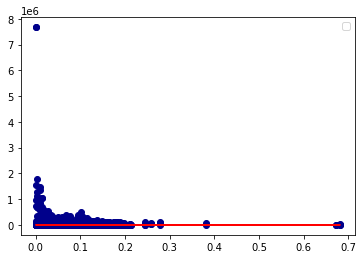

In [72]:
plt.plot(df_hist.rarity,df_hist.amount_dolars, 'o', label ='df',color='darkblue')
plt.plot(df_hist.rarity, intercept + slope * df_hist.rarity, 'r', label='fitted line') 

plt.legend('')
plt.show()

In [75]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df_hist.amount_eth,df_hist.amount_dolars)

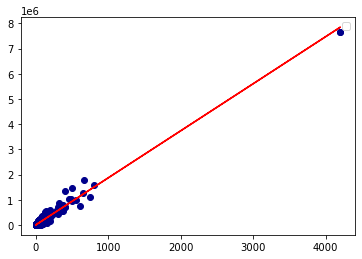

In [77]:
plt.plot(df_hist.amount_eth,df_hist.amount_dolars, 'o', label ='df',color='darkblue')
plt.plot(df_hist.amount_eth, intercept + slope * df_hist.amount_eth, 'r', label='fitted line') 

plt.legend('')
plt.show()